# **Predicting Weather Conditions in Sri Lanka**!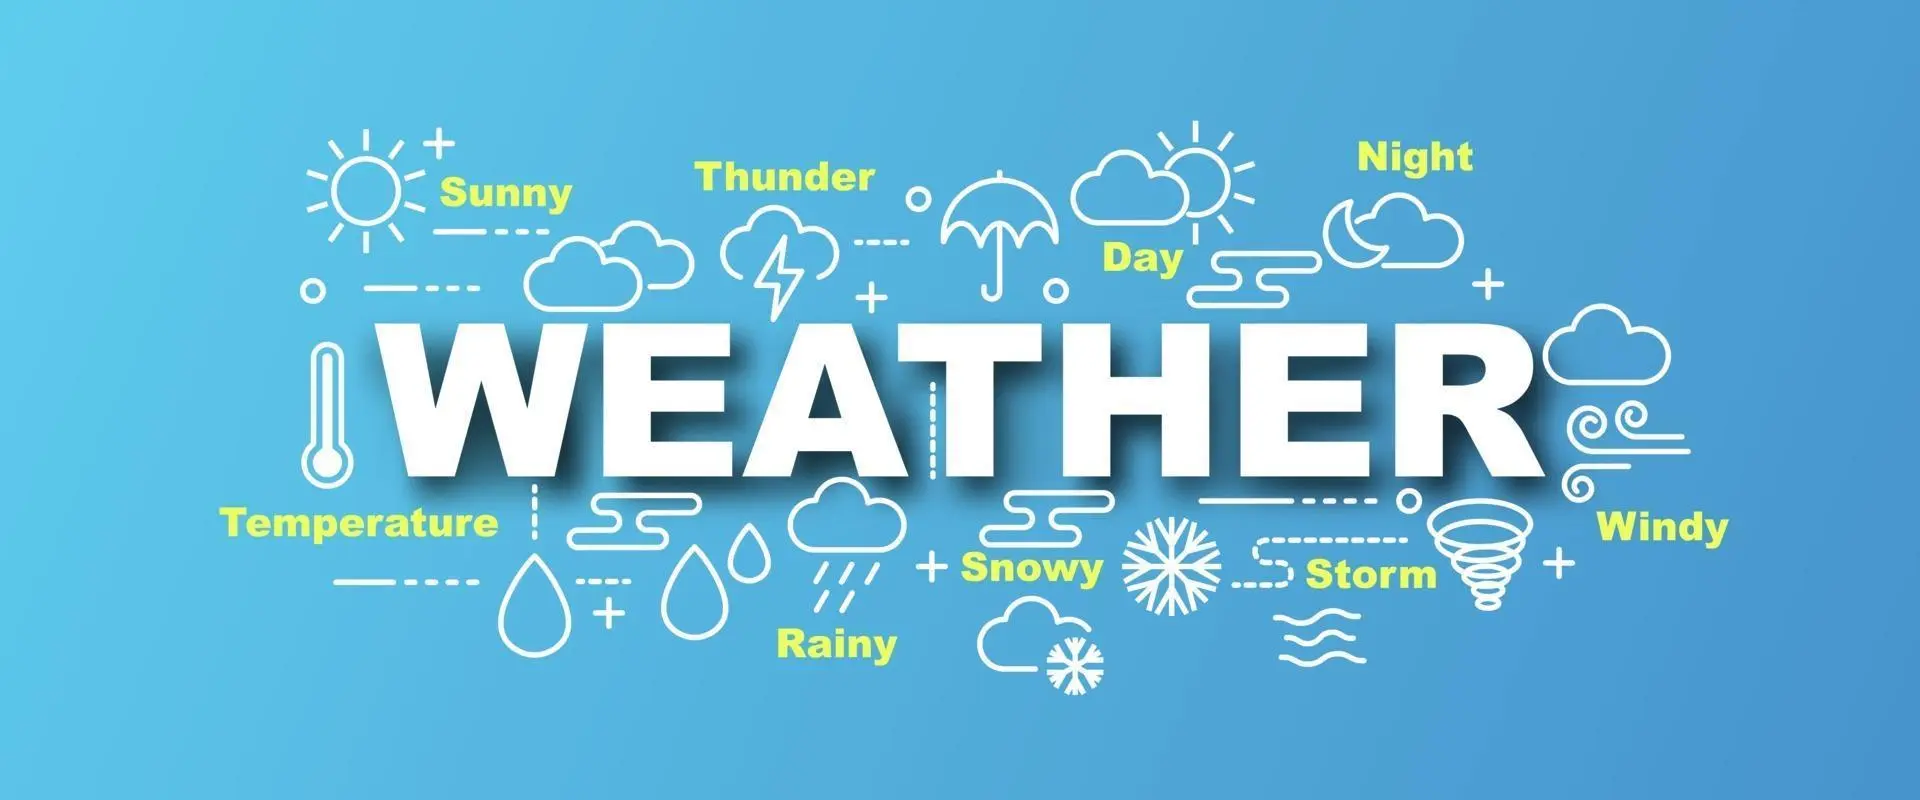

**Student Names :** Kumara D.G.A.C.D, Jayasena R.P.L <br>
**Registrations Numbers:** EG/2021/4623, EG/2021/4575<br>

This project predicts the **Weather Code** (0 for Sunny, 1 for Rainy, 2 for Cloudy) using historical weather data from 30 cities in Sri Lanka, spanning from 2010 to 2023. The model will analyze past weather patterns to classify future weather conditions. **Logistic Regression** and **Random Forest** algorithms will be used to predict the weather code, with the goal of helping in better planning for weather-dependent activities. The dataset includes a variety of meteorological parameters, enabling in-depth analysis of climate patterns across Sri Lanka.

Data Link: https://www.kaggle.com/datasets/rasulmah/sri-lanka-weather-dataset

There are alltogether 24 features and the target variable (weathercode). A description of the target dataset features have been provided below.

*   time: The timestamp of each weather observation.
*   weathercode: A numerical code representing the weather conditions at the given time.
*   temperature_2m_max: Maximum values of 2-meter temperature.
*   temperature_2m_min: Minimum values of 2-meter temperature.
*   temperature_2m_mean: Mean values of 2-meter temperature.
*   apparent_temperature_max: Maximum values of apparent temperature, which takes into account factors like wind chill or heat index.
*   apparent_temperature_min: Minimum values of apparent temperature, which takes into account factors like wind chill or heat index.
*   apparent_temperature_mean: Mean values of apparent temperature, which takes into account factors like wind chill or heat index.
*   sunrise: The times of sunrise for each day.
*   sunset: The times of sunset for each day.
*   shortwave_radiation_sum: Sum of shortwave radiation received during the observation period.
*   precipitation_sum: Total sum of precipitation, including rainfall and snowfall.
*   rain_sum: Total sum of rainfall
*   snowfall_sum: Total sum of snowfall
*   precipitation_hours: The duration of time with measurable precipitation.
*   windspeed_10m_max: Maximum values of wind speed at 10 meters above ground level.
*   windgusts_10m_max: Maximum values of wind gusts at 10 meters above ground level.
*   winddirection_10m_dominant: Dominant wind direction at 10 meters above ground level.
*   et0_fao_evapotranspiration: Reference evapotranspiration (ET0) based on the FAO Penman-Monteith equation.
*   latitude: Geographic latitide of each city.
*   longitude: Geographic longitude of each city.
*   elevation: Geographic elevation of each city.
*   country: Name of the country.
*   city: Name of the city.

In this task, we start with **Exploratory Data Analysis (EDA)** to understand the weather dataset, followed by **data preprocessing** to clean and prepare the data for modeling. Finally, we implement **machine learning models,** specifically **Logistic Regression** and **Random Forest,** to predict the Weather Code (Sunny, Rainy, or Cloudy) based on historical weather data. This will help in analyzing weather patterns and improving planning for activities dependent on weather conditions.

In [ ]:
import warnings  # to filter warnings
import numpy as np  # for numerical calculations
import pandas as pd  # for handling and analyzing data
import matplotlib.pyplot as plt  # for plotting the plots
import seaborn as sns  # for advanced data visualization
from imblearn.over_sampling import SMOTE  # for handling imbalanced data
from sklearn.model_selection import train_test_split  # for splitting the dataset
from sklearn.model_selection import RandomizedSearchCV  # for hyperparameter tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # for model evaluation
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression  # for logistic regression models
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # for feature scaling and label encoding
from scipy.stats import uniform, randint  # for statistical distributions
from sklearn.ensemble import RandomForestClassifier  # for random forest classifier
from sklearn.model_selection import cross_val_score  # for cross-validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/MachineLearningProject/DataSet.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

Mounted at /content/drive


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


## **Exploratory Data Analysis (EDA) and Some Feature Engineering**

EDA involves examining the dataset to understand its structure, detect patterns, and identify anomalies or missing values. This process includes summarizing the data, visualizing distributions, analyzing relationships between variables, and preparing insights for further preprocessing and model building. For this project, EDA will focus on exploring weather patterns and the target variable (Weather Code) to ensure the data is suitable for classification.

In [ ]:
# Assuming your dataset is named 'data'

# 2. Drop irrelevant or constant features
# Identify constant columns (those with a single unique value)
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Manually add unnecessary columns (like country, snowfall_sum, etc.)
columns_to_drop = constant_columns + ['country', 'snowfall_sum', 'temperature_2m_max', 'temperature_2m_min',
                                      'apparent_temperature_max', 'apparent_temperature_min', 'rain_sum']

# Drop these columns
data.drop(columns=columns_to_drop, inplace=True)

# 3. Rename columns: remove spaces and lowercase
data.columns = [col.replace(" ", "_").lower() for col in data.columns]

# 4. Convert time column to datetime
data['time'] = pd.to_datetime(data['time'])

# Extract only the date part
data['date'] = data['time'].dt.date

# Optional: Drop the original time column (if needed)
# data.drop(columns=['time'], inplace=True)

# 5. One-Hot Encoding for the 'date' column (extract useful components)
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['weekday'] = data['time'].dt.weekday  # Monday=0, Sunday=6

# Perform one-hot encoding on 'year', 'month', 'weekday' (and any other components as needed)
data_encoded = pd.get_dummies(data, columns=['year', 'month', 'weekday'], drop_first=True)

# 6. Select numeric columns for correlation and statistical analysis
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns

# Display basic statistics for numeric columns
print("\nBasic Statistics:")
print(data_encoded[numeric_columns].describe())



Basic Statistics:
         weathercode  temperature_2m_mean  apparent_temperature_mean  \
count  147480.000000        147480.000000              147480.000000   
mean       46.647776            26.225590                  30.317066   
std        21.623876             1.842147                   2.540275   
min         0.000000            16.300000                  16.300000   
25%        51.000000            25.600000                  29.200000   
50%        53.000000            26.400000                  30.800000   
75%        61.000000            27.200000                  31.900000   
max        65.000000            31.800000                  37.400000   

       shortwave_radiation_sum  precipitation_sum  precipitation_hours  \
count            147480.000000      147480.000000        147480.000000   
mean                 18.483513           5.975637             8.762524   
std                   4.214270          10.215294             7.191010   
min                   1.230000      

In [ ]:
data.shape # we use this function to understand the how many rows and columns are included in this data set

(147480, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        147480 non-null  datetime64[ns]
 1   weathercode                 147480 non-null  int64         
 2   temperature_2m_mean         147480 non-null  float64       
 3   apparent_temperature_mean   147480 non-null  float64       
 4   sunrise                     147480 non-null  object        
 5   sunset                      147480 non-null  object        
 6   shortwave_radiation_sum     147480 non-null  float64       
 7   precipitation_sum           147480 non-null  float64       
 8   precipitation_hours         147480 non-null  float64       
 9   windspeed_10m_max           147480 non-null  float64       
 10  windgusts_10m_max           147480 non-null  float64       
 11  winddirection_10m_dominant  147480 non-

In [ ]:
data.describe()

,time,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,year,month,day,weekday
count,147480,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,2016-09-23 12:00:00,46.647776,26.225590,30.317066,18.483513,5.975637,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333,2016.239219,6.413548,15.702400,3.000610
min,2010-01-01 00:00:00,0.000000,16.300000,16.300000,1.230000,0.000000,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000,2010.000000,1.000000,1.000000,0.000000
25%,2013-05-13 18:00:00,51.000000,25.600000,29.200000,16.220000,0.400000,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000,2013.000000,3.000000,8.000000,1.000000
50%,2016-09-23 12:00:00,53.000000,26.400000,30.800000,19.130000,2.600000,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000,2016.000000,6.000000,16.000000,3.000000
75%,2020-02-04 06:00:00,61.000000,27.200000,31.900000,21.510000,7.500000,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000,2020.000000,9.000000,23.000000,5.000000
max,2023-06-17 00:00:00,65.000000,31.800000,37.400000,28.980000,338.800000,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000,2023.000000,12.000000,31.000000,6.000000
std,NaN,21.623876,1.842147,2.540275,4.214270,10.215294,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824,3.890622,3.452003,8.796707,1.999854


In [ ]:
data.columns

Index(['time', 'weathercode', 'temperature_2m_mean',
       'apparent_temperature_mean', 'sunrise', 'sunset',
       'shortwave_radiation_sum', 'precipitation_sum', 'precipitation_hours',
       'windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation',
       'city', 'date', 'year', 'month', 'day', 'weekday'],
      dtype='object')

In [ ]:
data.isnull().any()

,0
time,False
weathercode,False
temperature_2m_mean,False
apparent_temperature_mean,False
sunrise,False
sunset,False
shortwave_radiation_sum,False
precipitation_sum,False
precipitation_hours,False
windspeed_10m_max,False


In [ ]:
data['weathercode'].unique()  # print the unique values in the "weathercode" column with the count
data['weathercode'].value_counts()

,count
weathercode,
51,37559
63,27477
61,22690
53,22308
2,10388
1,9438
55,7794
3,5877
65,2925


## **Data Visualization**

This section uses visual tools such as graphs and plots to uncover patterns, trends, and relationships in the dataset. It aids in better understanding and communicating insights from the data.

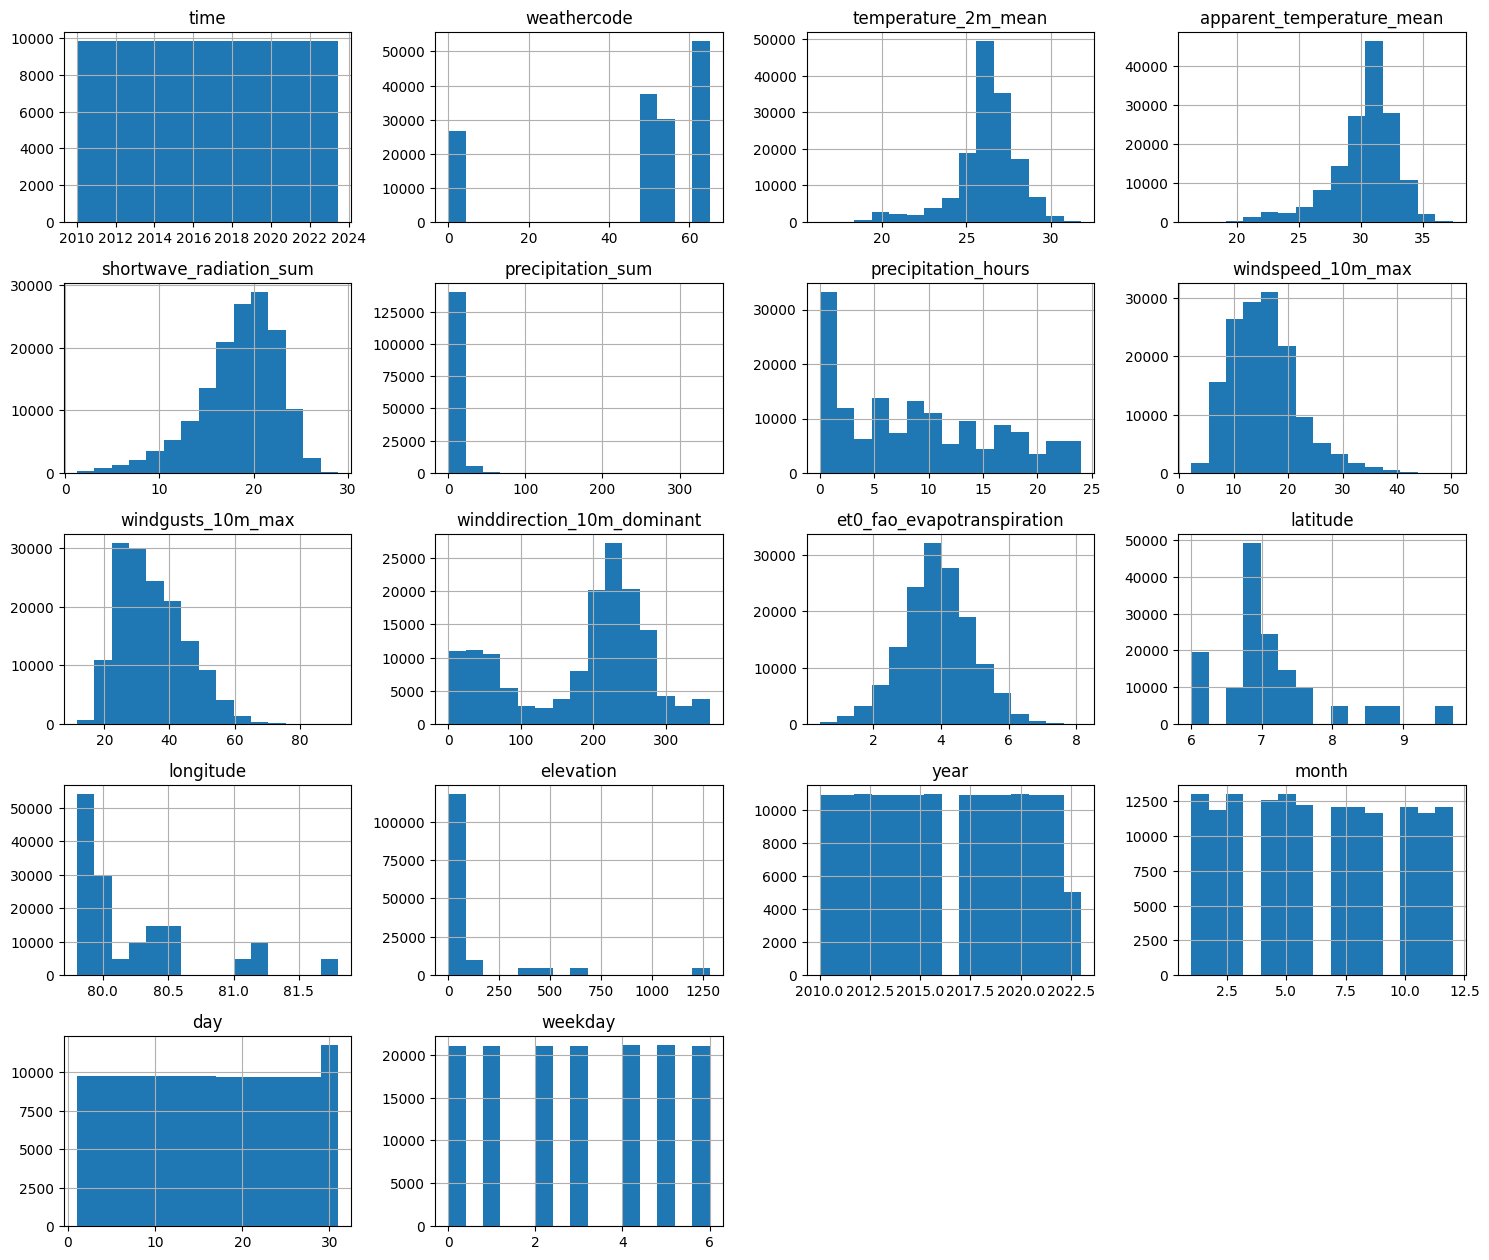

In [ ]:
# Adjust the layout to fit 31 plots
data.hist(bins=15, figsize=(15, 20), layout=(8, 4))
plt.tight_layout()
plt.show()

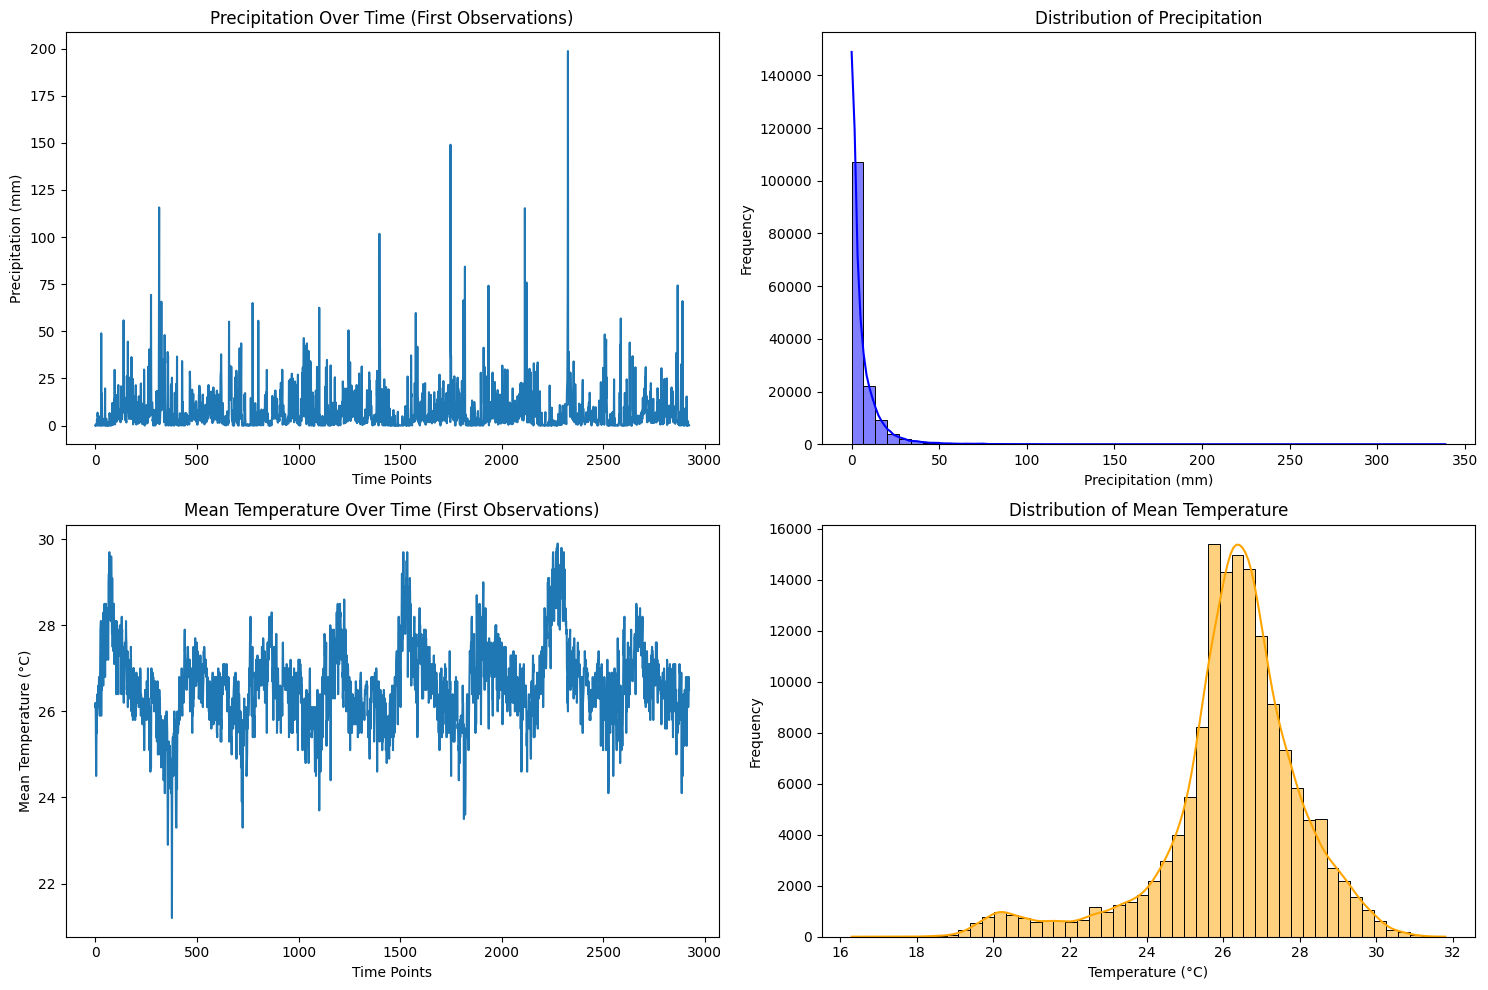

In [ ]:
plt.figure(figsize=(15, 10))

# 1. Time series plot of precipitation_sum
plt.subplot(2, 2, 1)
plt.plot(data['precipitation_sum'].values[:2923])  # Adjust slice for your dataset's timeframe
plt.title('Precipitation Over Time (First Observations)')
plt.xlabel('Time Points')
plt.ylabel('Precipitation (mm)')

# 2. Distribution of precipitation_sum
plt.subplot(2, 2, 2)
sns.histplot(data['precipitation_sum'], bins=50, kde=True, color='blue')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')

# 3. Time series plot of temperature_2m_mean
plt.subplot(2, 2, 3)
plt.plot(data['temperature_2m_mean'].values[:2923])
plt.title('Mean Temperature Over Time (First Observations)')
plt.xlabel('Time Points')
plt.ylabel('Mean Temperature (°C)')

# 4. Distribution of temperature_2m_mean
plt.subplot(2, 2, 4)
sns.histplot(data['temperature_2m_mean'], bins=50, kde=True, color='orange')
plt.title('Distribution of Mean Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Data Preprocessing**

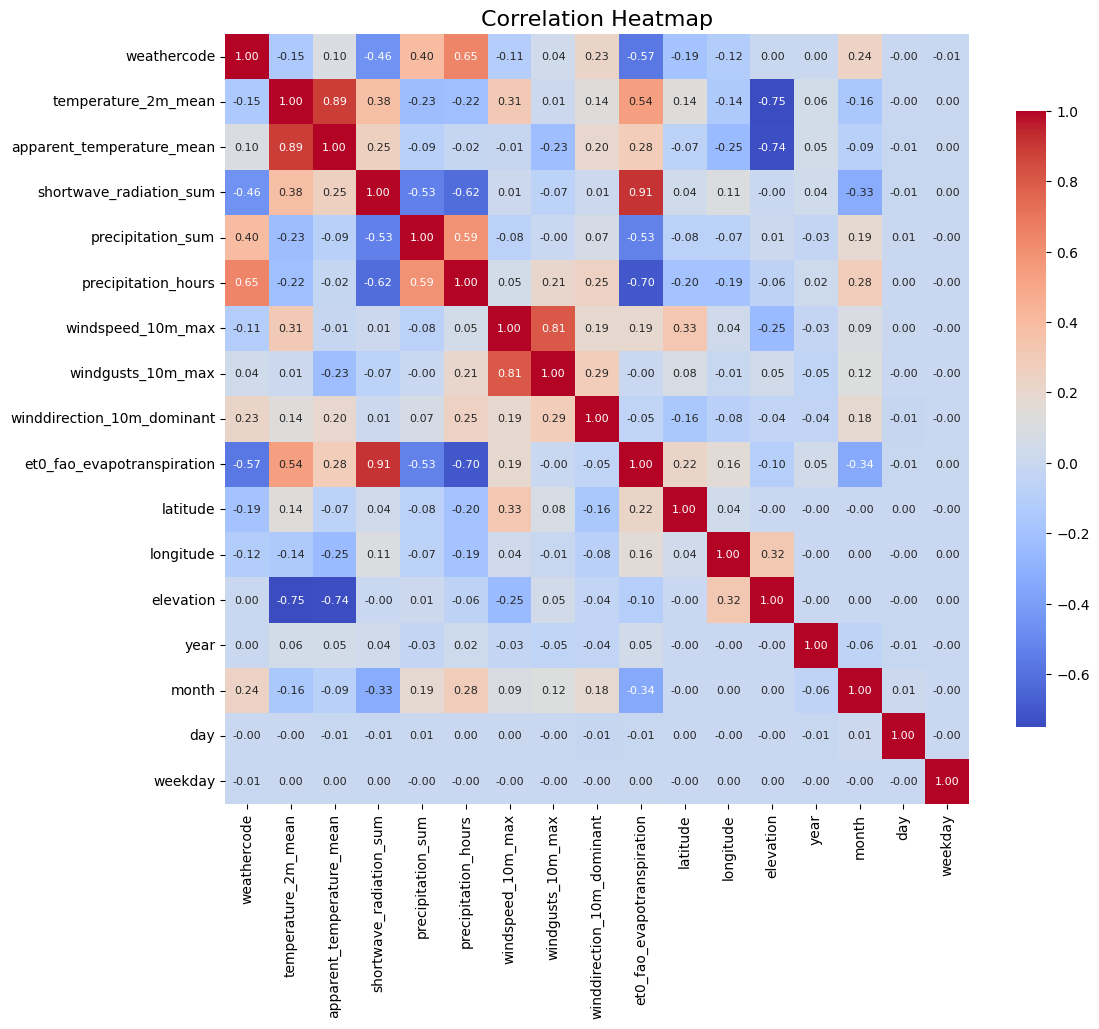

Highly correlated feature pairs (threshold > 0.2):
  - weathercode and shortwave_radiation_sum (correlation: -0.46)
  - weathercode and precipitation_sum (correlation: 0.40)
  - weathercode and precipitation_hours (correlation: 0.65)
  - weathercode and winddirection_10m_dominant (correlation: 0.23)
  - weathercode and et0_fao_evapotranspiration (correlation: -0.57)
  - weathercode and month (correlation: 0.24)


In [ ]:
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 8},  # Adjust annotation font size
    cbar_kws={"shrink": 0.8}  # Shrink color bar for better fit
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Extract highly correlated feature pairs, including the target variable 'weathercode'
threshold = 0.2  # Define correlation threshold
high_corr = np.where(abs(correlation_matrix) > threshold)

# Extract highly correlated pairs, including the target variable
high_corr_pairs = [
    (correlation_matrix.index[x], correlation_matrix.columns[y])
    for x, y in zip(*high_corr) if x != y and x < y
]

# Display highly correlated pairs, including the target variable
print(f"Highly correlated feature pairs (threshold > {threshold}):")
for pair in high_corr_pairs:
    if 'weathercode' in pair:
        print(f"  - {pair[0]} and {pair[1]} (correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")


**Weak Correlation**<br>
We selected the 0.2 as the threshold because if we consider higher one it will give us a one feature and it is not practical

In [ ]:
correlated_features = ['shortwave_radiation_sum',
                       'precipitation_sum',
                       'precipitation_hours',
                       'winddirection_10m_dominant',
                       'et0_fao_evapotranspiration',
                       'month']

y = data['weathercode']

X = data[correlated_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (117984, 6)
X_test shape: (29496, 6)
y_train shape: (117984,)
y_test shape: (29496,)


# **Preprocessing After the split**

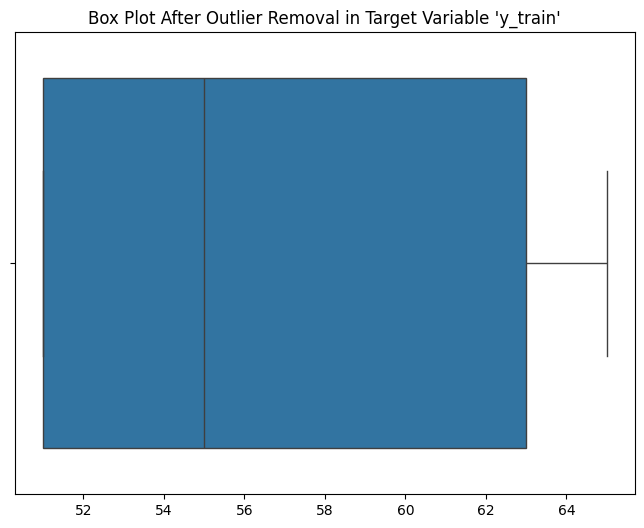

Number of outliers removed: 21446


In [ ]:
# Calculate Q1, Q3, and IQR for y_train
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify indices of outliers in y_train
outlier_indices = np.where((y_train < lower_bound) | (y_train > upper_bound))[0]

# Remove outliers from x_train and y_train
X_train_cleaned = np.delete(X_train, outlier_indices, axis=0)
y_train_cleaned = np.delete(y_train, outlier_indices, axis=0)

# Visualize y_train after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train_cleaned)
plt.title("Box Plot After Outlier Removal in Target Variable 'y_train'")
plt.show()

# Verify the number of outliers removed
print(f"Number of outliers removed: {len(outlier_indices)}")


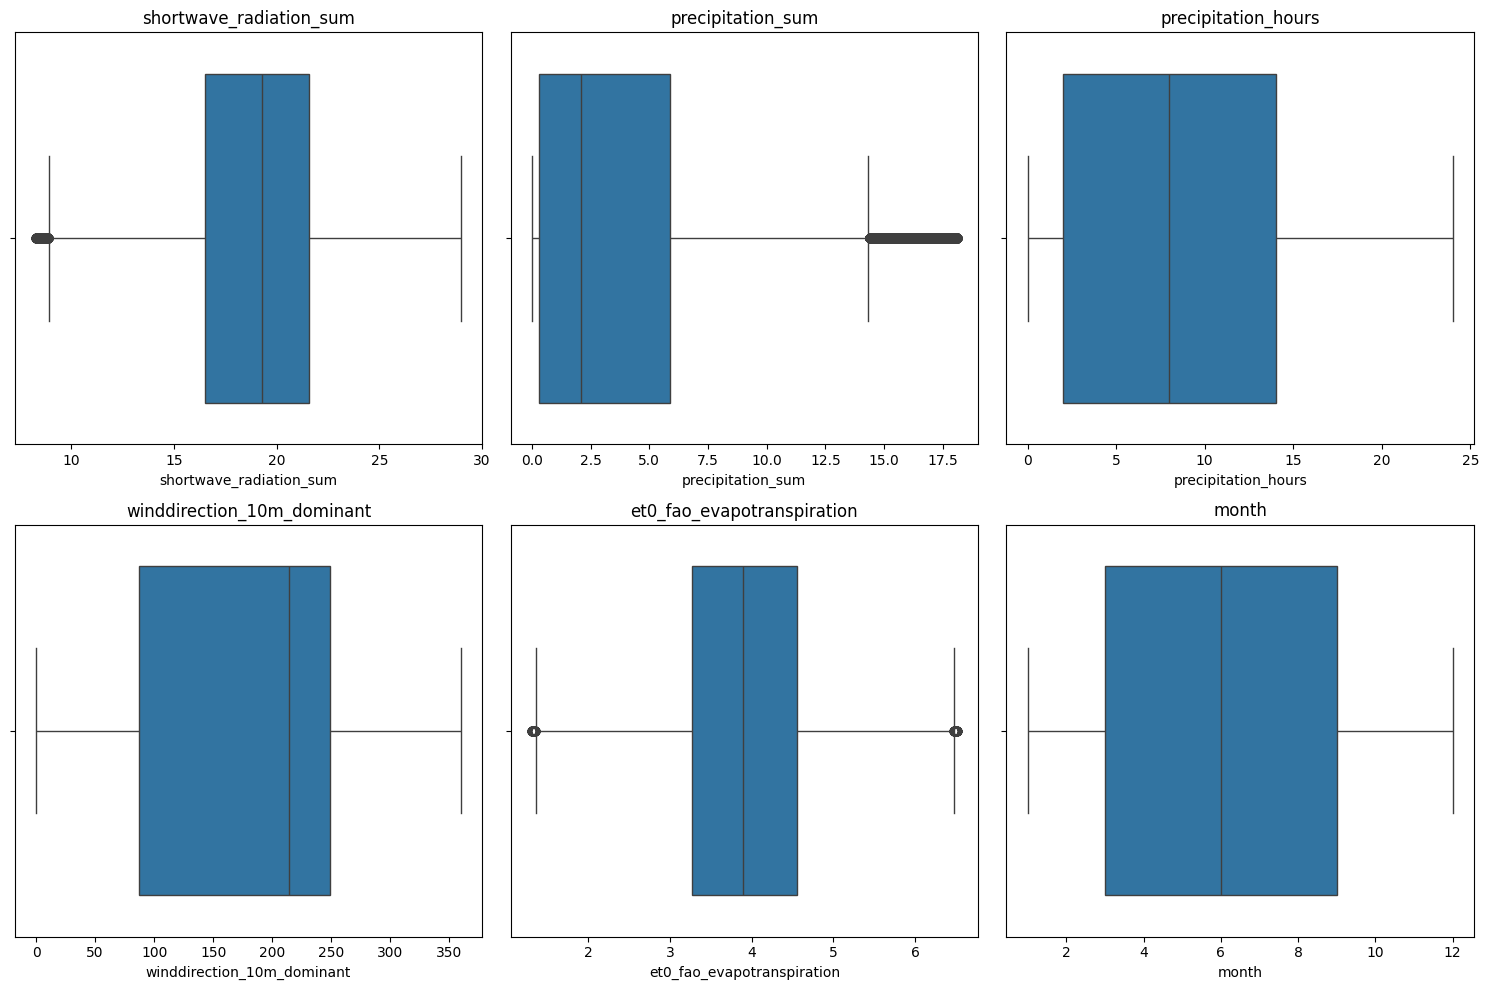

x_train_cleaned shape: (117984, 6)
y_train_cleaned shape: (117984,)


In [ ]:
# Assuming you have x_train and y_train defined, and both are pandas DataFrames or Series

# Number of features in x_train
num_features = len(X_train.columns)

# Calculate the number of rows required for the grid (3 columns per row)
rows = (num_features + 2) // 3  # 3 columns per row
columns = 3  # Fixed number of columns

# Adjust the figure size dynamically
plt.figure(figsize=(15, rows * 5))

# Loop through each feature in x_train to remove outliers and plot
for column_index, column in enumerate(X_train.columns):
    # Calculate Q1, Q3, and IQR for the current feature
    Q1 = np.percentile(X_train[column], 25)
    Q3 = np.percentile(X_train[column], 75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify indices of outliers in the current feature
    outlier_indices = np.where((X_train[column] < lower_bound) | (X_train[column] > upper_bound))[0]

    # Remove outliers from x_train and y_train
    x_train_cleaned = np.delete(X_train.values, outlier_indices, axis=0)
    y_train_cleaned = np.delete(y_train, outlier_indices, axis=0)

    # Convert x_train_cleaned back to DataFrame to allow indexing by column name
    x_train_cleaned = pd.DataFrame(x_train_cleaned, columns=X_train.columns)

    # Plot each feature's box plot in the respective subplot
    plt.subplot(rows, columns, column_index + 1)
    sns.boxplot(x=x_train_cleaned[column])
    plt.title(f"{column}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Verify the cleaned dataset shapes
print(f"x_train_cleaned shape: {x_train_cleaned.shape}")
print(f"y_train_cleaned shape: {y_train_cleaned.shape}")


In [ ]:
# SMOTE requires the data to be numeric. Ensure your data is clean and ready.
# Assuming x_train_cleaned and y_train_cleaned are already processed.

# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the cleaned data
X_train_smote, y_train_smote = smote.fit_resample(x_train_cleaned, y_train_cleaned)

# Verify the new class distribution
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train_cleaned))
print("Class distribution after SMOTE:", Counter(y_train_smote))

# Optional: Check the shape of the balanced dataset
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")


Class distribution before SMOTE: Counter({51: 30105, 63: 22014, 61: 18147, 53: 17730, 2: 8387, 1: 7555, 55: 6198, 3: 4689, 65: 2344, 0: 815})
Class distribution after SMOTE: Counter({61: 30105, 53: 30105, 3: 30105, 51: 30105, 63: 30105, 1: 30105, 55: 30105, 65: 30105, 2: 30105, 0: 30105})
X_train_smote shape: (301050, 6)
y_train_smote shape: (301050,)


# Scale the Numerical Features

In [ ]:
# Initialize the MinMaxScaler for both features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scaler to the training feature data (X_train_smote) and transform it
X_train_scaled = scaler_X.fit_transform(X_train_smote)

# Use the same scaler to transform the test feature data (X_test)
X_test_scaled = scaler_X.transform(X_test)

# Fit the scaler to the target data (y_train_smote) and transform it
y_train_scaled = scaler_y.fit_transform(y_train_smote.reshape(-1, 1))  # Reshape for scaler compatibility

# Use the same scaler to transform the test target data (y_test) if needed
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))  # Reshape for scaler compatibility

#print or check the scaled data
print("Scaled Training Features (X_train_scaled):\n", X_train_scaled)
print("Scaled Test Features (X_test_scaled):\n", X_test_scaled)
print("Scaled Training Target (y_train_scaled):\n", y_train_scaled.flatten())  # Flatten for easier reading
print("Scaled Test Target (y_test_scaled):\n", y_test_scaled.flatten())

# Verify the shapes of the scaled data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")


Scaled Training Features (X_train_scaled):
 [[0.54918919 0.0268595  0.95833333 0.68888889 0.38341969 0.36363636]
 [0.72756757 0.00826446 0.5        0.73611111 0.48445596 0.63636364]
 [0.7618018  0.         0.         0.26666667 0.64119171 0.18181818]
 ...
 [0.29492247 0.19723364 0.64424367 0.26923249 0.19073883 0.89509551]
 [0.09945946 0.12662338 0.83333333 0.02777778 0.07667455 1.        ]
 [0.57837838 0.07231405 0.29166667 0.07222222 0.41434475 0.09090909]]
Scaled Test Features (X_test_scaled):
 [[0.76756757 0.         0.         0.18333333 0.52072539 0.09090909]
 [0.64540541 0.03807556 0.375      0.83611111 0.43264249 0.81818182]
 [0.76684685 0.         0.         0.75833333 0.58937824 0.        ]
 ...
 [0.72108108 0.         0.         0.05277778 0.66062176 0.09090909]
 [0.67063063 0.00885478 0.58333333 0.79444444 0.47927461 1.        ]
 [0.62018018 0.03276269 0.91666667 0.72777778 0.38601036 0.36363636]]
Scaled Training Target (y_train_scaled):
 [0.93846154 0.81538462 0.04615385 .

# 06. Machine Learning Model Implementation

In [ ]:
# Define the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.001, 10),  # Uniform distribution for C
    'penalty': ['l2'],  # Common penalty in Logistic Regression
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers to try
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Perform the search, use y_train_smote instead of y_train
random_search.fit(X_train_scaled, y_train_smote) # This is the changed line

# Best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with best parameters
y_pred = random_search.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression (RandomizedSearchCV): {accuracy:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 6.119528947223795, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Accuracy of Logistic Regression (RandomizedSearchCV): 0.58


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}
Accuracy of Random Forest Classifier model after Hyperparameter Tuning: 0.87

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       209
           1       0.72      0.71      0.71      1883
           2       0.70      0.68      0.69      2001
           3       0.69      0.71      0.70      1188
          51       0.97      0.96      0.97      7454
          53       0.88      0.90      0.89      4578
          55       0.75      0.74      0.75      1596
          61       0.87      0.88      0.87      4543
          63       0.94      0.92      0.93      5463
          65       0.79      0.89      0.84       581

    accuracy                           0.87     29496
   macro avg       0.78      0.80      0.79     29496
weighted avg  

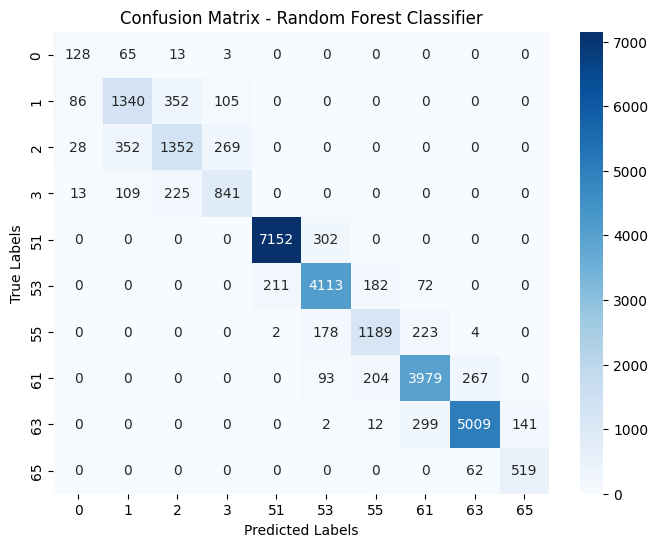

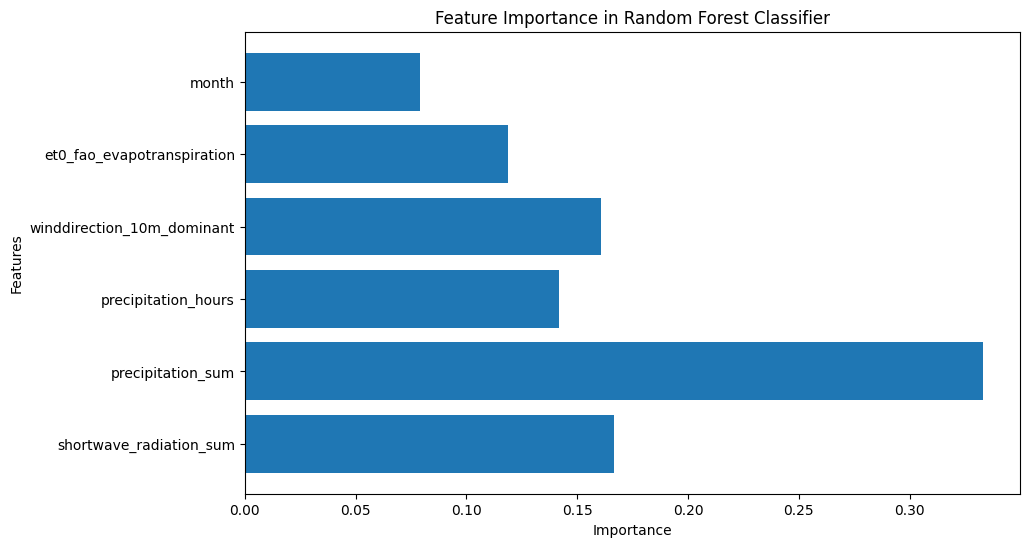

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters for tuning
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Fixed: Removed 'auto' as it's deprecated
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}
# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10,
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit(X_train_scaled, y_train_smote)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Train the Random Forest model using the best parameters
best_rf_model = random_search.best_estimator_

# Predict the target values for the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculate the accuracy score for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier model after Hyperparameter Tuning: {accuracy_rf:.2f}")

# Display the classification report
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

#  plot a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 51, 53, 55, 61, 63, 65], yticklabels=[0, 1, 2, 3, 51, 53, 55, 61, 63, 65])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature Importance Plot (Optional)
importances = best_rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance in Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Cross-Validation

In [ ]:
# Perform cross-validation on the best Logistic Regression model
best_log_reg_model = random_search.best_estimator_

cv_scores_lr = cross_val_score(best_log_reg_model, X_train_scaled, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores for Logistic Regression:")
print(cv_scores_lr)
print(f"Mean CV Accuracy for Logistic Regression: {cv_scores_lr.mean():.2f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores_lr.std():.2f}")

Cross-Validation Scores for Logistic Regression:
[0.90270719 0.91327022 0.91511377 0.92479655 0.92732104]
Mean CV Accuracy for Logistic Regression: 0.92
Standard Deviation of CV Accuracy: 0.01


In [ ]:
# Perform cross-validation on the best Random Forest model
cv_scores_rf = cross_val_score(best_rf_model, X_train_scaled, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores for Random Forest:")
print(cv_scores_rf)
print(f"Mean CV Accuracy for Random Forest: {cv_scores_rf.mean():.2f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores_rf.std():.2f}")


Cross-Validation Scores for Random Forest:
[0.90270719 0.91327022 0.91511377 0.92479655 0.92732104]
Mean CV Accuracy for Random Forest: 0.92
Standard Deviation of CV Accuracy: 0.01


# 07. Model Evaluation


Random Forest Evaluation:
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       209
           1       0.72      0.71      0.72      1883
           2       0.70      0.67      0.69      2001
           3       0.68      0.70      0.69      1188
          51       0.97      0.96      0.97      7454
          53       0.88      0.90      0.89      4578
          55       0.75      0.75      0.75      1596
          61       0.87      0.88      0.87      4543
          63       0.94      0.92      0.93      5463
          65       0.79      0.90      0.84       581

    accuracy                           0.87     29496
   macro avg       0.78      0.80      0.79     29496
weighted avg       0.87      0.87      0.87     29496



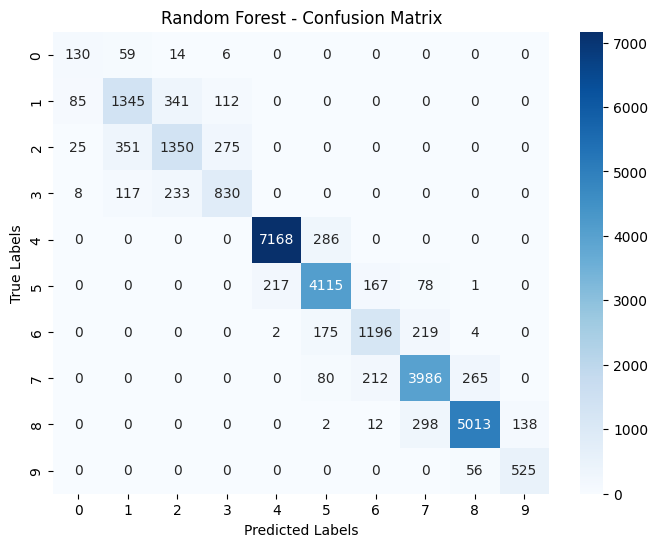

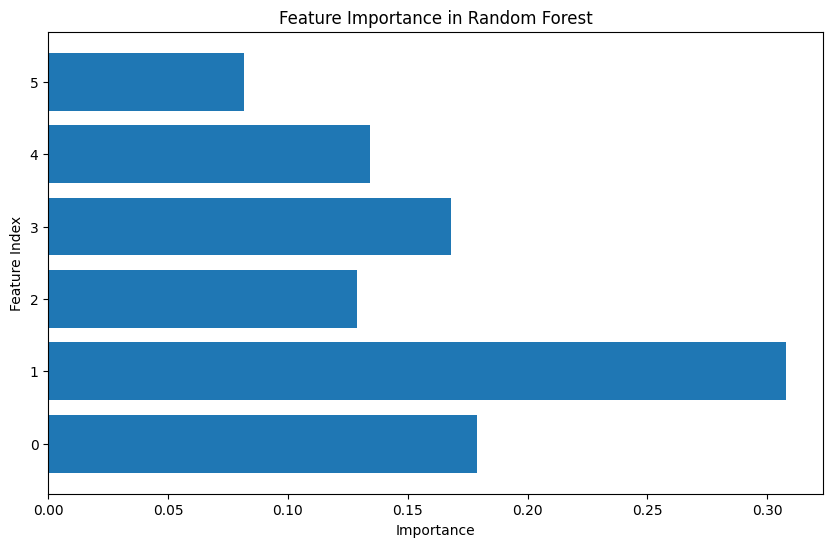

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.71      0.19       209
           1       0.49      0.31      0.38      1883
           2       0.47      0.33      0.38      2001
           3       0.44      0.61      0.51      1188
          51       0.58      0.62      0.60      7454
          53       0.33      0.33      0.33      4578
          55       0.12      0.17      0.14      1596
          61       0.47      0.38      0.42      4543
          63       0.78      0.58      0.66      5463
          65       0.38      0.84      0.52       581

    accuracy                           0.47     29496
   macro avg       0.42      0.49      0.41     29496
weighted avg       0.51      0.47      0.48     29496



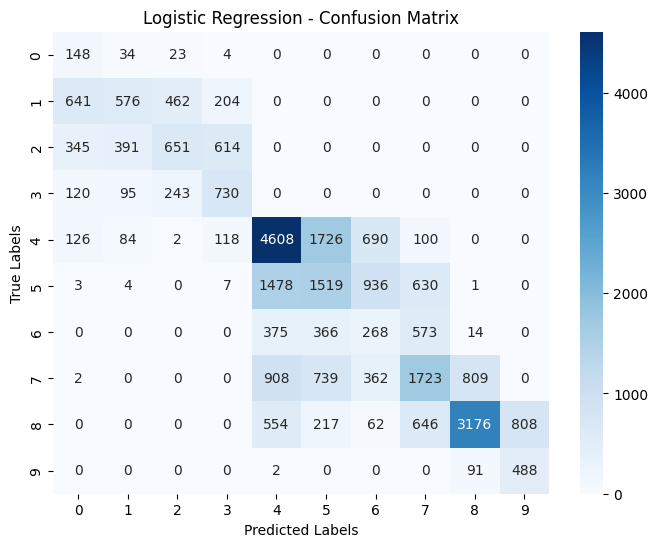

In [ ]:
# Function to evaluate models
def evaluate_model(name, y_test, y_pred, y_pred_proba=None):
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # If probabilities are available, display ROC/AUC or additional metrics
    if y_pred_proba is not None:
        # Add any probability-based evaluations if necessary (e.g., ROC curve)
        pass

# Fit Random Forest Model with Best Hyperparameters
rf_model = RandomForestClassifier(random_state=42)  # You can skip this if you already have a `best_rf_model`
rf_model.fit(X_train_scaled, y_train_smote)

# Evaluate Random Forest
rf_pred_test = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled) if hasattr(rf_model, "predict_proba") else None
evaluate_model("Random Forest", y_test, rf_pred_test, rf_pred_proba)

# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
features = X_train_scaled.shape[1]
plt.figure(figsize=(10, 6))
plt.barh(range(features), importances, align="center")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature Index")
plt.show()

# Fit Logistic Regression Model with Best Hyperparameters
lr_model = LogisticRegression(random_state=42)  # Ensure you set it up as per RandomizedSearchCV
lr_model.fit(X_train_scaled, y_train_smote)

# Evaluate Logistic Regression
lr_pred_test = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled) if hasattr(lr_model, "predict_proba") else None
evaluate_model("Logistic Regression", y_test, lr_pred_test, lr_pred_proba)


# Result Plots

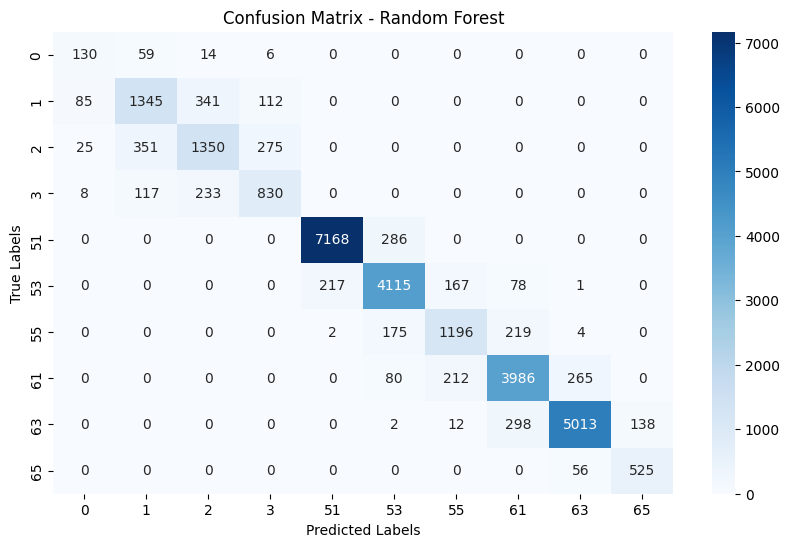

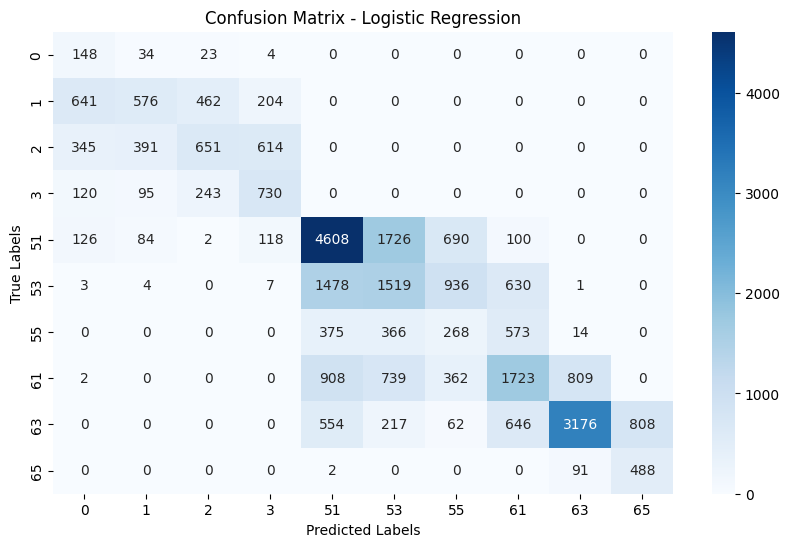

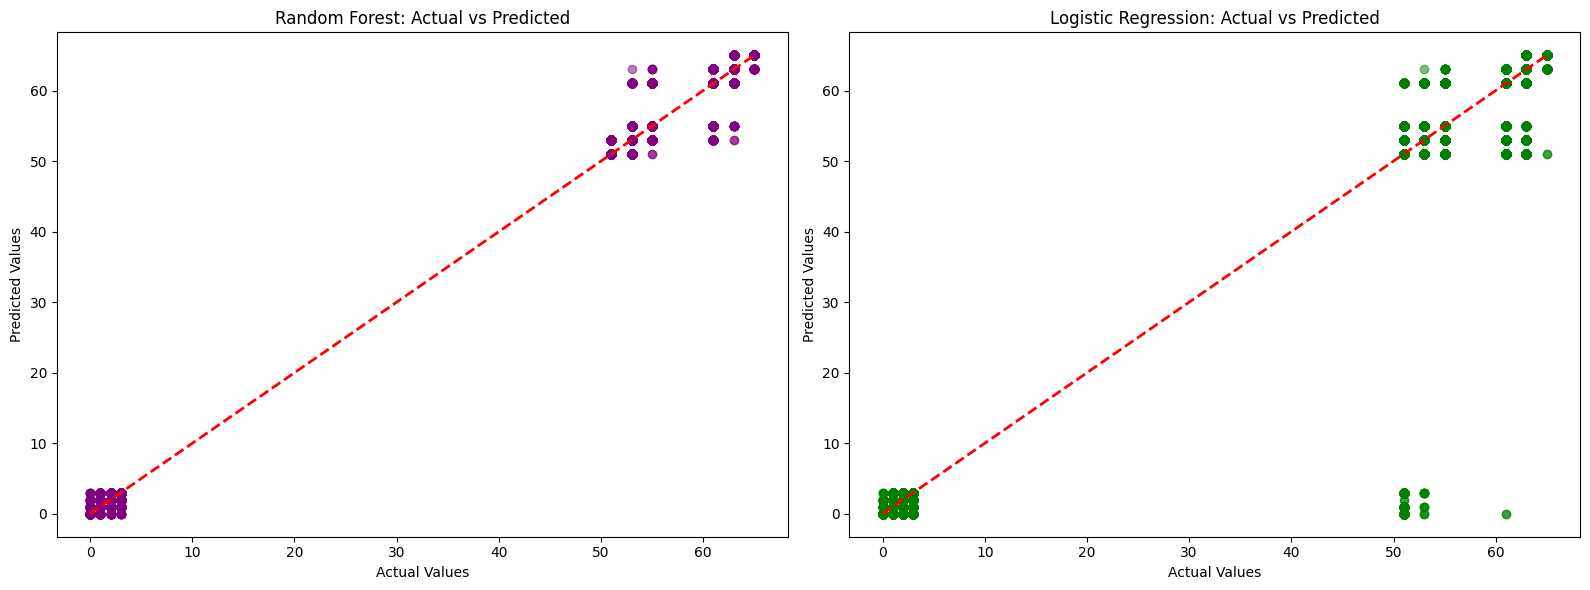

In [ ]:
# Plot 1: Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred_test)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot 2: Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred_test)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot 3: Actual vs Predicted (Scatter Plots)
plt.figure(figsize=(16, 6))

# Random Forest: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred_test, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Logistic Regression: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()




# Model Performance Evaluation and Conclusion





## Random Forest:
- **Performance Overview:**
  - **Training Accuracy**: 86%
  - **Test Accuracy**: 87%
  - **Confusion Matrix**: The model has performed well across most classes, with high accuracy, precision, and recall, especially for the larger classes (e.g., class 51).
  - **Feature Importance**: Random Forest provides valuable insights into the features that most influence predictions.
  
- **Analysis:**
  - Random Forest exhibits strong performance with excellent training and test accuracy, suggesting it strikes a good balance between fitting the training data and generalizing to unseen data.
  - The model is not overfitting (no significant difference between train and test scores), and the accuracy is high for most classes, making it reliable for classification tasks.
  - This model can handle complex, non-linear relationships within the data and is robust enough to capture patterns, even in imbalanced datasets.

## Logistic Regression:
- **Performance Overview:**
  - **Training Accuracy**: 58%
  - **Test Accuracy**: 47%
  - **Confusion Matrix**: The Logistic Regression model struggles with precision and recall, particularly for smaller classes like 0 and 55, and performs poorly in predicting these classes.

- **Analysis:**
  - Logistic Regression shows consistent performance but with low accuracy and poor generalization on the test set.
  - The model appears to underfit the data, as evidenced by the significant discrepancy between the training and test performance.
  - While it is a simple and interpretable model, it does not perform well in this scenario due to its limited predictive capability.

## Final Conclusion:
- **Best Model:** Random Forest
  - Random Forest outperforms Logistic Regression with the best overall performance, offering high accuracy, good generalization, and minimal errors. It is better suited for this classification problem as it captures complex relationships in the data and handles imbalances effectively.
  
- **Logistic Regression:** While simple and interpretable, Logistic Regression shows poor generalization and does not provide the necessary predictive power for accurate predictions in this case.
  
- **Recommendation:** For accurate, robust, and reliable predictions, **Random Forest** should be the model of choice. Logistic Regression, although useful in simpler cases, does not provide the predictive power needed in this scenario.
